In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn import metrics, preprocessing
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
warnings.filterwarnings('ignore')
from pycaret.regression import *

In [2]:
df = pd.read_csv('./car/grandeur_firstName_dummies.csv')
# df_k5 = pd.read_csv('./car/k5_engColumns_noname_dummies.csv')
# df_morning = pd.read_csv('./car/morning_engColumns_noname_dummies.csv')
# df_tucson = pd.read_csv('./car/tucson_engColumns_noname_dummies.csv')
print(df.shape)
# print(df_k5.shape)
# print(df_morning.shape)
# print(df_tucson.shape)

(1977, 99)


In [3]:
df

,year,distance,name_HG,name_IG,name_TG,name_normal,name_the_all_new,name_the_luxury,name_the_new,fuel_LPG,...,mp3,AUX,USB,handsfree,iPod,back_monitor,mirroring,non_genu_navi,bluetooth,price
0,14,121523,True,False,False,False,False,False,False,False,...,0,1,0,0,0,0,0,0,0,790
1,19,69368,False,True,False,False,False,False,False,False,...,0,1,0,0,0,0,0,0,0,2190
2,18,94692,False,True,False,False,False,False,False,False,...,0,1,1,0,1,0,0,0,1,1990
3,18,79252,False,True,False,False,False,False,False,True,...,0,1,0,0,0,0,0,0,0,1795
4,18,139269,False,True,False,False,False,False,False,False,...,0,1,1,0,0,0,1,0,1,1339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,10,97366,False,False,False,False,False,True,False,False,...,0,0,0,0,0,0,0,0,0,590
1973,11,170000,True,False,False,False,False,False,False,False,...,1,1,1,1,0,0,0,0,0,459
1974,19,120000,False,True,False,False,False,False,False,False,...,0,1,0,0,0,0,0,0,0,1690
1975,13,128220,True,False,False,False,False,False,False,True,...,0,1,1,0,0,0,0,0,0,979


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1581, 98)
(396, 98)
(1581,)
(396,)


In [9]:
sample = setup(data=X_train, target=y_train)

,Description,Value
0,Session id,7875
1,Target,price
2,Target type,Regression
3,Original data shape,"(1581, 99)"
4,Transformed data shape,"(1581, 99)"
5,Transformed train set shape,"(1106, 99)"
6,Transformed test set shape,"(475, 99)"
7,Numeric features,82
8,Preprocess,True
9,Imputation type,simple


In [10]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,137.9935,35824.8883,187.9500,0.9589,0.1453,0.1041,0.0800
lightgbm,Light Gradient Boosting Machine,140.1375,36764.7163,190.3097,0.9580,0.1431,0.1048,0.0980
et,Extra Trees Regressor,146.2838,38785.5789,196.3842,0.9551,0.1555,0.1129,0.2950
xgboost,Extreme Gradient Boosting,149.3103,41903.6380,203.4272,0.9517,0.1583,0.1121,0.0570
rf,Random Forest Regressor,148.7416,42220.4959,203.2670,0.9512,0.1478,0.1088,0.2510
lasso,Lasso Regression,170.3497,51998.7153,226.4817,0.9399,0.2643,0.1506,0.0160
llar,Lasso Least Angle Regression,170.3485,51998.0040,226.4800,0.9399,0.2643,0.1506,0.0150
ridge,Ridge Regression,172.3600,53379.6293,229.6738,0.9382,0.2640,0.1531,0.0150
lr,Linear Regression,171.7073,53810.8672,230.3084,0.9377,0.2651,0.1518,0.7720
br,Bayesian Ridge,175.1658,54077.0791,231.4870,0.9374,0.2801,0.1562,0.0150


In [43]:
result = pull()

In [46]:
df_result = pd.DataFrame(result)

In [58]:
df_result

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,137.9935,3.582489e+04,187.9500,0.9589,0.1453,0.1041,0.080
lightgbm,Light Gradient Boosting Machine,140.1375,3.676472e+04,190.3097,0.9580,0.1431,0.1048,0.100
et,Extra Trees Regressor,146.2838,3.878558e+04,196.3842,0.9551,0.1555,0.1129,0.295
xgboost,Extreme Gradient Boosting,149.3103,4.190364e+04,203.4272,0.9517,0.1583,0.1121,0.051
rf,Random Forest Regressor,148.7416,4.222050e+04,203.2670,0.9512,0.1478,0.1088,0.245
lasso,Lasso Regression,170.3497,5.199872e+04,226.4817,0.9399,0.2643,0.1506,0.018
llar,Lasso Least Angle Regression,170.3485,5.199800e+04,226.4800,0.9399,0.2643,0.1506,0.017
ridge,Ridge Regression,172.3600,5.337963e+04,229.6738,0.9382,0.2640,0.1531,0.015
lr,Linear Regression,171.7073,5.381087e+04,230.3084,0.9377,0.2651,0.1518,0.016
br,Bayesian Ridge,175.1658,5.407708e+04,231.4870,0.9374,0.2801,0.1562,0.017


In [11]:
model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,141.6556,45231.4250,212.6768,0.9460,0.1323,0.0918
1,152.3704,38995.3089,197.4723,0.9537,0.1265,0.0949
2,142.8210,33728.3871,183.6529,0.9631,0.1390,0.1034
3,119.8046,24989.0686,158.0793,0.9664,0.1425,0.1069
4,121.7702,28716.3842,169.4591,0.9696,0.1193,0.0863
5,146.4380,41570.7372,203.8890,0.9577,0.1954,0.1018
6,142.2241,35114.8788,187.3896,0.9668,0.1749,0.1275
7,169.8418,53483.0515,231.2640,0.9449,0.1782,0.1374
8,124.1789,30586.9754,174.8913,0.9568,0.1266,0.1001


In [26]:
tuned_model = tune_model(model, n_iter=100, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,134.7233,32672.0081,180.7540,0.9610,0.1227,0.0909
1,158.1947,41257.6876,203.1199,0.9510,0.1327,0.0982
2,128.9033,29395.9596,171.4525,0.9678,0.1239,0.0918
3,138.0483,32741.0524,180.9449,0.9559,0.1596,0.1194
4,124.1751,30085.0304,173.4504,0.9682,0.1457,0.0933
5,149.5473,45064.3101,212.2836,0.9541,0.2114,0.1030
6,146.2459,39801.3762,199.5028,0.9624,0.1875,0.1299
7,163.4913,48719.4588,220.7248,0.9498,0.1605,0.1294
8,127.0664,30217.3548,173.8314,0.9574,0.1320,0.1017


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [27]:
save_model(tuned_model, model_name='./grandeur_gbr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['year', 'distance', 'sunroof',
                                              'HID', 'Al_wheel', 'auto_mirror',
                                              'DLR', 'sunroof_pano', 'roof_rack',
                                              'LED', 'HBA', 'ghost_door',
                                              'sliding_door', 'side_step',
                                              'adap_h', 'driver_heated_seat',
                                              'driver_ventilated_seat',
                                              'power_steering',
                                              'steering_remote', 'leahter_seat',
                                              'driver...
                                              'pass_memory_seat',
                                              'back_heated_seat', ...],
                                     transf

In [29]:
g_load = load_model('./grandeur_gbr')

Transformation Pipeline and Model Successfully Loaded


In [30]:
g_load['trained_model']

GradientBoostingRegressor(max_depth=4, max_features=1.0,
                          min_impurity_decrease=0.0001, min_samples_split=10,
                          n_estimators=200, random_state=7875, subsample=0.3)

In [22]:
tuned_model = tune_model()

array([737318.70512138, 616877.00955407, 518722.77307506, 437519.49046861,
       371293.06386529, 315766.05519664, 268292.14637986, 229874.18916596,
       198339.77508479, 171472.09444341, 149633.17236098, 131930.7184989 ,
       116805.14420867, 104332.72339916,  93456.42204055,  84747.92654265,
        77119.73440818,  70708.94678419,  65263.28161205,  60649.37065872,
        56600.02173098,  53201.04458114,  50051.32969981,  47512.35735627,
        45130.61482682,  43211.25362109,  41446.54452682,  39951.96607064,
        38559.67691001,  37320.64896417,  36122.13180868,  35169.00993055,
        34261.84395675,  33471.90038555,  32698.9654995 ,  31924.67568043,
        31350.85571177,  30763.15700918,  30244.49310661,  29784.59579469,
        29361.84932815,  28781.28115377,  28441.21681363,  28120.89913695,
        27807.29355554,  27547.34856956,  27296.19325902,  26968.66011457,
        26769.02546519,  26489.27519125,  26254.05849405,  25943.2206601 ,
        25677.57969955,  

In [ ]:
final_model = finalize_model()

# DecisionTree Regressor

In [31]:
depth_dt = np.arange(5, 15)
max_leaf_nodes_dt = np.arange(35, 45)
min_sample_leaf_dt = np.arange(1, 8)
parameters_dt = {'max_depth':depth_dt, 
                 'min_samples_leaf':min_sample_leaf_dt,
                 'max_leaf_nodes':max_leaf_nodes_dt}

In [32]:
gridCV = GridSearchCV(DecisionTreeRegressor(), 
                      param_grid=parameters_dt, 
                      n_jobs=-1)
gridCV.fit(X_train, y_train)
best_estimator_dt = gridCV.best_estimator_
best_params_dt = gridCV.best_params_

In [33]:
best_params_dt

{'max_depth': 7, 'max_leaf_nodes': 44, 'min_samples_leaf': 3}

In [34]:
predict_dt = best_estimator_dt.predict(X_test)
print('Best MAPE of DecisionTree Regressor : {}'.format(np.round(metrics.mean_absolute_percentage_error(y_test, predict_dt), 3)))

Best MAPE of DecisionTree Regressor : 0.115


In [35]:
import joblib
joblib.dump(best_estimator_dt, './model/grandeur_dt.pkl')

['./model/grandeur_dt.pkl']

# RandomForest

In [83]:
n_estimators_rf = np.arange(500, 610, 10)
depth_rf = np.arange(14, 20)
min_samples_leaf_rf = np.arange(1, 4) 
max_features_rf = np.arange(5, 10)
min_samples_split_rf = np.arange(1, 4)
parameters_rf = {'n_estimators' : n_estimators_rf,
                 'max_depth' : depth_rf,
                 'min_samples_leaf' : min_samples_leaf_rf,
                 'max_features' : max_features_rf,
                 'min_samples_split' : min_samples_split_rf}

In [84]:
gridCV = GridSearchCV(estimator=RandomForestRegressor(),
                      param_grid=parameters_rf,
                      n_jobs=-1)
gridCV.fit(X_train, y_train)
best_params_rf = gridCV.best_params_
best_estimator_rf = gridCV.best_estimator_

KeyboardInterrupt: 

In [ ]:
best_params_rf

In [ ]:
predict_rf = best_estimator_rf.predict(X_test)
print('Best MAPE of RandomForest Regressor', np.round(metrics.mean_absolute_percentage_error(y_test, predict_rf), 3))

# AdaBoost

In [37]:
depth_ada = 15
learn_rate_ada = 0.001      
n_estimators_ada = np.arange(75, 150)
parameters_ada = {'n_estimators' : n_estimators_ada}

In [38]:
adaBoost = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=depth_ada), 
                             learning_rate=learn_rate_ada)
# learning_rate : 학습률, 이전 모델의 오차를 얼마나 반영하여 학습할 것인지?
#               : 학습률이 크면 속도는 빠르지만 발산할 가능성이 높음
#               : 학습률이 작으면 속도는 느리지만 모델이 안정적으로 수렴

gridCV = GridSearchCV(adaBoost, param_grid=parameters_ada, n_jobs=-1)
gridCV.fit(X_train, y_train)
best_params_ada = gridCV.best_params_
best_estimator_ada = gridCV.best_estimator_

In [39]:
best_params_ada

{'n_estimators': 140}

In [40]:
predict_ada = best_estimator_ada.predict(X_test)
print('Best MAPE of AdaBoost Regressor', np.round(metrics.mean_absolute_percentage_error(y_test, predict_ada), 3))

Best MAE of AdaBoost Regressor 155.421


# GradientBoosting Regressor

In [55]:
depth_gb = np.arange(1, 15)
n_estimators_gb = np.arange(75, 150)
learn_rate_gb = 0.001
parameters_gb = {'n_estimators' : n_estimators_gb,
                 'max_depth' : depth_gb}

In [56]:
gb = GradientBoostingRegressor(learning_rate=learn_rate_gb)
gridCV = GridSearchCV(estimator=gb, param_grid=parameters_gb, n_jobs=-1)
gridCV.fit(X_train, y_train)
best_params_gradient = gridCV.best_params_
best_estimator_gradient = gridCV.best_estimator_

In [57]:
predict_gradient = best_estimator_gradient.predict(X_test)
print('Best MAPE of GradientBoosting Regressor', np.round(metrics.mean_absolute_percentage_error(y_test, predict_gradient), 3))

Best MAE of GradientBoosting Regressor 682.019


# LightGBM

In [ ]:
depth_lgb = np.arange(1, 15)
n_estimators_lgb = np.arange(75, 150)
learn_rate_lgb = 0.0001
parameters_lgb = {'n_estimators' : n_estimators_lgb,
                  'max_depth' : depth_lgb}

In [ ]:
lgb = LGBMRegressor(learning_rate=learn_rate_lgb)
gridCV = GridSearchCV(estimator=lgb, param_grid=parameters_lgb, n_jobs=-1)
gridCV.fit(X_train, y_train)
best_params_lgb = gridCV.best_params_
best_estimator_lgb = gridCV.best_estimator_

In [ ]:
predict_lgb = best_estimator_lgb.predict(X_test)
print('Best MAPE of LightGBM Regressor', np.round(metrics.mean_absolute_percentage_error(y_test, predict_lgb), 3))

# XGBoost Regressor

In [99]:
depth_xgb = np.arange(1, 8)
n_estimators_xgb = np.arange(1000, 5100, 100)
learn_rate_xgb = [0.01, 0.001, 0.0001]
gamma_xgb = [0.1, 0.2]
parameters_xgb = {'n_estimators' : n_estimators_xgb,
                  'max_depth' : depth_xgb,
                  'learning_rate' : learn_rate_xgb,
                  'gamma' : gamma_xgb}

In [100]:
xgb = XGBRegressor()
gridCV = GridSearchCV(estimator=xgb, param_grid=parameters_xgb, n_jobs=-1)
gridCV.fit(X_train, y_train)
best_params_xgb = gridCV.best_params_
best_estimator_xgb = gridCV.best_estimator_

In [101]:
best_params_xgb

{'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 4800}

In [102]:
predict_xgb = best_estimator_xgb.predict(X_test)
print('Best MAPE of XGBoost Regressor', np.round(metrics.mean_absolute_percentage_error(y_test, predict_xgb), 3))

Best MAPE of XGBoost Regressor 0.092


In [103]:
predict_xgb = best_estimator_xgb.predict(X_test)
print('Best RMSE of XGBoost Regressor', np.round(np.sqrt(metrics.mean_squared_error(y_test, predict_xgb)), 3))

Best RMSE of XGBoost Regressor 169.855


# Feature Importance & R2 Score

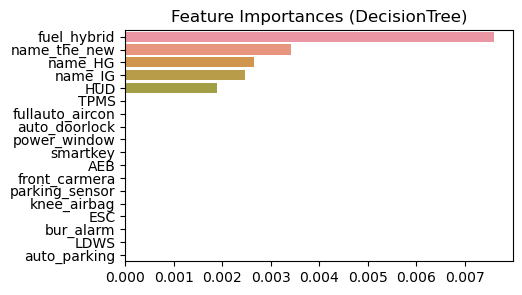

In [27]:
feature_importance = pd.Series(best_estimator_dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)[2:20]
plt.figure(figsize=(5, 3))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importances (DecisionTree)')
plt.show()

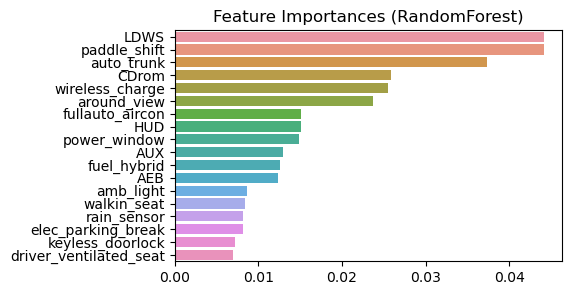

In [53]:
feature_importance = pd.Series(best_estimator_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)[2:20]
plt.figure(figsize=(5, 3))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importances (RandomForest)')
plt.show()

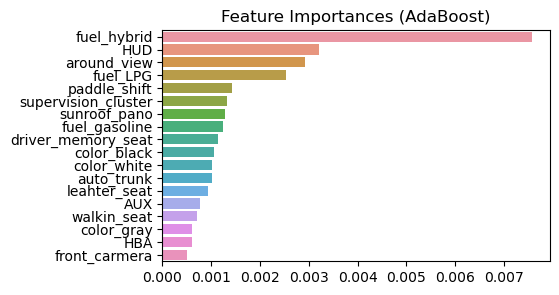

In [54]:
feature_importance = pd.Series(best_estimator_ada.feature_importances_, index=X_train.columns).sort_values(ascending=False)[2:20]
plt.figure(figsize=(5, 3))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importances (AdaBoost)')
plt.show()

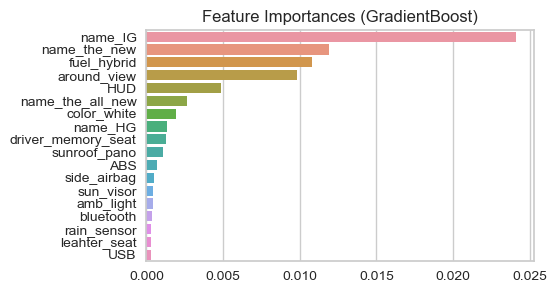

In [25]:
feature_importance = pd.Series(tuned_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)[2:20]
plt.figure(figsize=(5, 3))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importances (GradientBoost)')
plt.show()

In [58]:
feature_importance = pd.Series(best_estimator_lgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)[2:20]
plt.figure(figsize=(5, 3))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importances (LightGBM)')
plt.show()

NameError: name 'best_estimator_lgb' is not defined

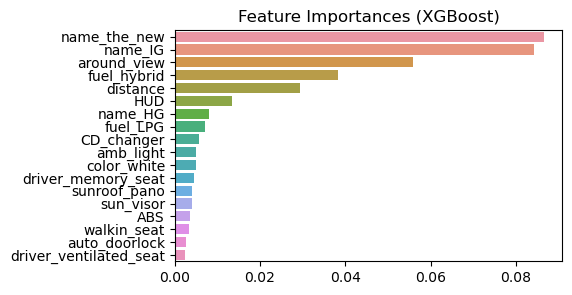

In [104]:
feature_importance = pd.Series(best_estimator_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)[2:20]
plt.figure(figsize=(5, 3))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importances (XGBoost)')
plt.show()

In [28]:
def adj_r2_score(y_true, y_pred, p=X.shape[1]):
    return 1 - (1 - metrics.r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - p - 1)

In [29]:
print('R2 Score of DecisionTree Regressor', np.round(metrics.r2_score(y_test, predict_dt), 3))
print('Adj R2 Score of DecisionTree Regressor', np.round(adj_r2_score(y_test, predict_dt), 3))

R2 Score of DecisionTree Regressor 0.914
Adj R2 Score of DecisionTree Regressor 0.885


In [50]:
print('R2 Score of RandomForest', np.round(metrics.r2_score(y_test, predict_rf), 3))
print('Adj R2 Score of RandomForest', np.round(adj_r2_score(y_test, predict_rf), 3))

R2 Score of RandomForest 0.889
Adj R2 Score of RandomForest 0.856


In [51]:
print('R2 Score of AdaBoost', np.round(metrics.r2_score(y_test, predict_ada), 3))
print('Adj R2 Score of AdaBoost', np.round(adj_r2_score(y_test, predict_ada), 3))

R2 Score of RandomForest 0.954
Adj R2 Score of RandomForest 0.94


In [63]:
print('R2 Score of GradientBoost', np.round(metrics.r2_score(y_test, predict_gradient), 3))
print('Adj R2 Score of GradientBoost', np.round(adj_r2_score(y_test, predict_gradient), 3))

R2 Score of GradientBoost 0.241
Adj R2 Score of GradientBoost 0.014


In [ ]:
print('R2 Score of LightGBM', np.round(metrics.r2_score(y_test, predict_lgb), 3))
print('Adj R2 Score of LightGBM', np.round(adj_r2_score(y_test, predict_lgb), 3))

In [ ]:
print('R2 Score of XGBoost', np.round(metrics.r2_score(y_test, predict_xgb), 3))
print('Adj R2 Score of XGBoost', np.round(adj_r2_score(y_test, predict_xgb), 3))

In [106]:
import sklearn
sklearn.__version__

'1.4.0'

ModuleNotFoundError: No module named 'pycaret'